In [144]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"gva_mass_shootings-2025-10-21.csv")
df

,incident_id,incident_date,incident_time,updated_date,state,city_or_county,address,business_location_name,latitude,longitude,...,injured,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested,incident_characteristics,sources,date_fixed,year
0,809048,"April 1, 2017",NaN,1491348530,Florida,Tampa,219 S Howard Ave,Palace Lounge,27.9431,-82.4831,...,4,1,4,0,0,1,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""http://wfla.com/2017/04/01/tampa-police-inv...",2017-04-01,2017
1,809499,"April 1, 2017",5:25 AM,1680156402,Oklahoma,Oklahoma City,1212 N Woodward Ave,NaN,35.4810,-97.5754,...,3,2,3,0,0,1,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""http://www.news9.com/story/35055747/okc-pol...",2017-04-01,2017
2,809815,"April 1, 2017",NaN,1492995601,California,Pittsburg,100 block of Madoline Street,NaN,38.0053,-121.8950,...,5,0,5,0,0,1,"Shot - Wounded/Injured, Mass Shooting (4+ vict...",http://www.nbcbayarea.com/news/local/Shooting-...,2017-04-01,2017
3,1082835,"April 1, 2018",2:15 AM,1522693801,Michigan,Saginaw,600 block of Yale St,NaN,43.4192,-83.9819,...,5,0,5,0,0,0,"Shot - Wounded/Injured, Mass Shooting (4+ vict...",http://www.mlive.com/news/saginaw/index.ssf/20...,2018-04-01,2018
4,1083011,"April 1, 2018",NaN,1646889853,Alabama,Mobile,3556 Halls Mill Rd,Grand Hall,30.6387,-88.1228,...,4,1,4,0,0,3,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""http://www.al.com/news/mobile/index.ssf/201...",2018-04-01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463,2411007,"September 9, 2022",4:50 PM,1722738993,New York,Bronx,810 Astor Ave,Pelham Parkway Houses,40.8592,-73.8634,...,4,0,4,0,0,1,"Shot - Wounded/Injured, Mass Shooting (4+ vict...","c(""https://twitter.com/NYC_Alerts911/status/15...",2022-09-09,2022
5464,2411901,"September 9, 2022",11:50 PM,1689272621,Minnesota,Minneapolis,328 W Broadway Ave,4th Street Saloon,44.9994,-93.2848,...,3,1,3,0,0,0,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""https://www.fox9.com/news/2-pregnant-women-...",2022-09-09,2022
5465,2410446,"September 9, 2022",9:00 AM,1715920831,Maryland,Elk Mills,47 Hebron Ct,NaN,39.6611,-75.8365,...,0,4,0,1,0,0,"Shot - Dead (murder, accidental, or suicide), ...","c(""https://www.cbsnews.com/baltimore/news/five...",2022-09-09,2022
5466,2703975,"September 9, 2023",11:30 PM,1694472936,South Carolina,Rock Hill,800 block of Brunswick Dr,NaN,34.8921,-81.0411,...,4,0,4,0,0,2,"Shot - Wounded/Injured, Mass Shooting (4+ vict...",https://www.heraldonline.com/news/local/crime/...,2023-09-09,2023


In [145]:
years=list(range(2014,2025))
def get_edu(year):
    url_edu = f"https://api.census.gov/data/{year}/acs/acs1"
    params = {
        "get": "NAME,B15003_001E,B15003_002E,B15003_003E,B15003_004E,B15003_005E,"
        "B15003_006E,B15003_017E,B15003_022E,B15003_023E,B15003_025E",
        "for": "state:*"}
    response_1 = requests.get(url_edu, params=params)
    if response_1.status_code != 200:
        print(f"⚠️ {year}: HTTP {response_1.status_code} – skipping year")
        return pd.DataFrame()
    if not response_1.text.strip().startswith('[['):
        print(f"⚠️ {year}: invalid or empty response – skipping year")
        return pd.DataFrame()

    try:
        data = response_1.json()
    except Exception:
        print(f"⚠️ {year}: cannot decode JSON – skipping year")
        return pd.DataFrame()

    data = response_1.json()
    df_edu = pd.DataFrame(data[1:], columns=data[0])
    df_edu = df_edu.rename(columns={
        "NAME": "State",
        "B15003_001E": "Population_25plus",
        "B15003_002E": "No_Schooling_Completed",
        "B15003_003E": "Nursery_to_4th_Grade",
        "B15003_004E": "5th_to_6th_Grade",
        "B15003_005E": "7th_to_8th_Grade",
        "B15003_006E": "9th_Grade",
        "B15003_017E": "High_School_Graduate",
        "B15003_022E": "Bachelor_Degree",
        "B15003_023E": "Master_Degree",
        "B15003_025E": "Doctorate_Degree","state": "State_Code"})

    df_edu["Without Min Studies"]=df_edu[
        ["No_Schooling_Completed",
        "Nursery_to_4th_Grade",
        "5th_to_6th_Grade",
        "7th_to_8th_Grade",
        "9th_Grade"]].sum(axis=1)
    df_edu.drop(columns=["No_Schooling_Completed",
     "Nursery_to_4th_Grade",
     "5th_to_6th_Grade",
     "7th_to_8th_Grade",
     "9th_Grade","State_Code"], inplace=True)
    df_edu["year"]=year
    df_edu = df_edu[[
        "year", "State", "Population_25plus",
        "Without Min Studies", "High_School_Graduate",
        "Bachelor_Degree", "Master_Degree", "Doctorate_Degree"
    ]]
    return df_edu
frame=[]
for year in years:
    print(f"Fetching {year}...")
    df_year = get_edu(year)
    if not df_year.empty:
        frame.append(df_year)
df_edu = pd.concat(frame, ignore_index=True)
df_edu


Fetching 2014...
Fetching 2015...
Fetching 2016...
Fetching 2017...
Fetching 2018...
Fetching 2019...
Fetching 2020...
⚠️ 2020: HTTP 404 – skipping year
Fetching 2021...
Fetching 2022...
Fetching 2023...
Fetching 2024...


,year,State,Population_25plus,Without Min Studies,High_School_Graduate,Bachelor_Degree,Master_Degree,Doctorate_Degree
0,2014,Alabama,3256766,4356549153312303054,847523,478058,201391,33082
1,2014,Alaska,465149,328112814513577,108523,85634,33103,4304
2,2014,Arizona,4436226,6551349773143245977,899108,765784,328400,53578
3,2014,Arkansas,1968414,226383365018461493,568437,272411,104636,19380
4,2014,California,25654292,673107605487393741089646,4768478,5120162,2035257,394265
...,...,...,...,...,...,...,...,...
515,2024,Washington,5631460,958011353291819483343,975478,1372926,683345,113323
516,2024,West Virginia,1268689,13595730139218305,420214,187714,88027,13183
517,2024,Wisconsin,4172638,4413981610241295780,1057997,943201,362471,61628
518,2024,Wyoming,409344,460308100,90634,82918,35122,8475


In [146]:
url_edu = "https://api.census.gov/data/2021/acs/acs1"
params = {
    "get": "NAME,B15003_001E,B15003_002E,B15003_003E,B15003_004E,B15003_005E,"
           "B15003_006E,B15003_017E,B15003_022E,B15003_023E,B15003_025E",
    "for": "state:*"
}
years=list(range(2014,2025))
response_1 = requests.get(url_edu, params=params)

data = response_1.json()
df_edu = pd.DataFrame(data[1:], columns=data[0])
num_cols = [c for c in df_edu.columns if c.startswith("B15003_")]
df_edu[num_cols] = df_edu[num_cols].apply(pd.to_numeric)
df_edu = df_edu.rename(columns={
    "NAME": "State",
    "B15003_001E": "Population_25plus",
    "B15003_002E": "No_Schooling_Completed",
    "B15003_003E": "Nursery_to_4th_Grade",
    "B15003_004E": "5th_to_6th_Grade",
    "B15003_005E": "7th_to_8th_Grade",
    "B15003_006E": "9th_Grade",
    "B15003_017E": "High_School_Graduate",
    "B15003_022E": "Bachelor_Degree",
    "B15003_023E": "Master_Degree",
    "B15003_025E": "Doctorate_Degree","state": "State_Code"
  
})
df_edu["Without Min Studies"]=df_edu[
    ["No_Schooling_Completed",
     "Nursery_to_4th_Grade",
     "5th_to_6th_Grade",
     "7th_to_8th_Grade",
     "9th_Grade"]
].sum(axis=1)
df_edu.drop(columns=["No_Schooling_Completed",
     "Nursery_to_4th_Grade",
     "5th_to_6th_Grade",
     "7th_to_8th_Grade",
     "9th_Grade","State_Code"], inplace=True)

print(df_edu.columns)
df_edu


Index(['State', 'Population_25plus', 'High_School_Graduate', 'Bachelor_Degree',
       'Master_Degree', 'Doctorate_Degree', 'Without Min Studies'],
      dtype='object')


,State,Population_25plus,High_School_Graduate,Bachelor_Degree,Master_Degree,Doctorate_Degree,Without Min Studies
0,Alabama,3451208,902759,572276,271514,45110,57473
1,Puerto Rico,2401409,619884,493356,127459,33486,75728
2,Arizona,4980297,967537,985673,455187,76263,95958
3,Arkansas,2037763,572881,324137,140186,21775,35714
4,California,26909869,4909898,5958030,2573469,511191,1101187
5,Colorado,4044182,658973,1107309,500621,82500,63624
6,Connecticut,2534376,568748,587690,348217,48686,53943
7,Delaware,711104,178620,146295,80771,11932,9764
8,District of Columbia,478774,59776,120771,109362,23602,10602
9,Florida,15762122,3686864,3248221,1368496,225826,327997


In [147]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 52 non-null     object
 1   Population_25plus     52 non-null     int64 
 2   High_School_Graduate  52 non-null     int64 
 3   Bachelor_Degree       52 non-null     int64 
 4   Master_Degree         52 non-null     int64 
 5   Doctorate_Degree      52 non-null     int64 
 6   Without Min Studies   52 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.0+ KB


In [148]:
#### Add the prevalence percent of depression for each state in the US

In [149]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [150]:
## Read in the URL and scrape using BeautifulSoup 
url = "https://www.cdc.gov/mmwr/volumes/72/wr/mm7224a1.htm"

response = requests.get(url)


In [151]:
response

<Response [200]>

In [152]:
soup=BeautifulSoup(response.content)


In [153]:
## Data cleaning of data resulting from the scraping

In [154]:
table=soup.find_all(attrs={"class":"table table-bordered table-responsive"})

In [155]:
def get_country_percent(table):
    check=[]
    for tr in table[1].select("tbody"):
        for td in tr:
            m=td.get_text().strip().replace("\n","").replace(",","")
            check.append(m)
    return check[1::2]

In [156]:
country_raw=get_country_percent(table)

In [157]:
data_pattern = re.compile(
    r"""
    ^
    ([A-Za-z\s]+)         # Group 1: State Name (Letters and spaces from the start)
    (\d+)                  # Group 2: Count 1 (A sequence of digits)
    (\d+)                  # Group 3: Count 2 (A sequence of digits)
    (\d+)                  # Group 4: Count 3 (A sequence of digits)
    
    # Group 5: Rate 1 (e.g., '23.5 (22.1–25.0)')
    (
        [\d\.]+               # Match the main number (e.g., 23.5)
        \s?                   # Optional space (in case your data sometimes has a space)
        \(                    # Literal opening parenthesis
        [\d\.\,\–\-]+         # Match digits, dots, commas, en-dashes, or hyphens inside the parens
        \)                    # Literal closing parenthesis
    )
    
    # Group 6: Rate 2 (Identical format to Rate 1)
    (
        [\d\.]+
        \s?
        \(
        [\d\.\,\–\-]+
        \)
    )
    $
    """, re.VERBOSE # re.VERBOSE allows us to add comments and spacing for readability
)

In [158]:
def get_clean_data(word):
    structured=[]
    for item in word:
        match=data_pattern.match(item)
        structured.append(list(match.groups()))
    a=[]
    for i in structured:
        index=[0,2,3,4]
        for k in index:
            t=i[k]
            a.append(t)
    return a  

In [159]:
country_clean=get_clean_data(country_raw)

In [160]:
def merge_state_and_rate(flattened_list):
    """
    Merges the State Name (index i) with the constructed Rate 
    (indices i+1, i+2, and the first part of i+3) 
    for every four-item block in the list.
    """
    merged_results = []
    
    # Iterate through the list, starting at index 0 and stepping by 4
    for i in range(0, len(flattened_list), 4):
        
        # 1. State Name is at the current index 'i'
        state_name = flattened_list[i]
        
        # 2. Rate components are at i+1, i+2, and i+3.
        # We must strip the parenthetical part from the last element (i+3).
        rate_part1 = flattened_list[i + 1] # e.g., '2'
        rate_part2 = flattened_list[i + 2] # e.g., '3'
        rate_fragment = flattened_list[i + 3].split(' ')[0] # e.g., '.5' from '.5 (22.1–25.0)'
        
        # 3. Concatenate to form the final rate string
        merged_rate = f"{rate_part1}{rate_part2}{rate_fragment}" # e.g., '23.5'
        
        # 4. Combine the state and the rate into the desired format
        final_string = f"{state_name}, {merged_rate}"
        
        merged_results.append(final_string)
            
    return merged_results

In [161]:
# Percentage column formatted to numeric
def final_clean(table):
    data2=merge_state_and_rate(country_clean)
    processed_data = [item.split(', ') for item in data2]
    df = pd.DataFrame(processed_data, columns=["state", "prevalence_percent"])
    df["prevalence_percent"]=pd.to_numeric(df["prevalence_percent"])
    return df

In [162]:
final_country_perc=final_clean(country_clean)

In [163]:
final_country_perc

,state,prevalence_percent
0,Alabama,23.5
1,Alaska,15.9
2,Arizona,17.4
3,Arkansas,23.5
4,California,14.1
5,Colorado,18.5
6,Connecticut,17.7
7,Delaware,15.6
8,District of Columbia,19.8
9,Florida,14.7


C:\Users\HP\AppData\Local\Temp\ipykernel_14180\183166321.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


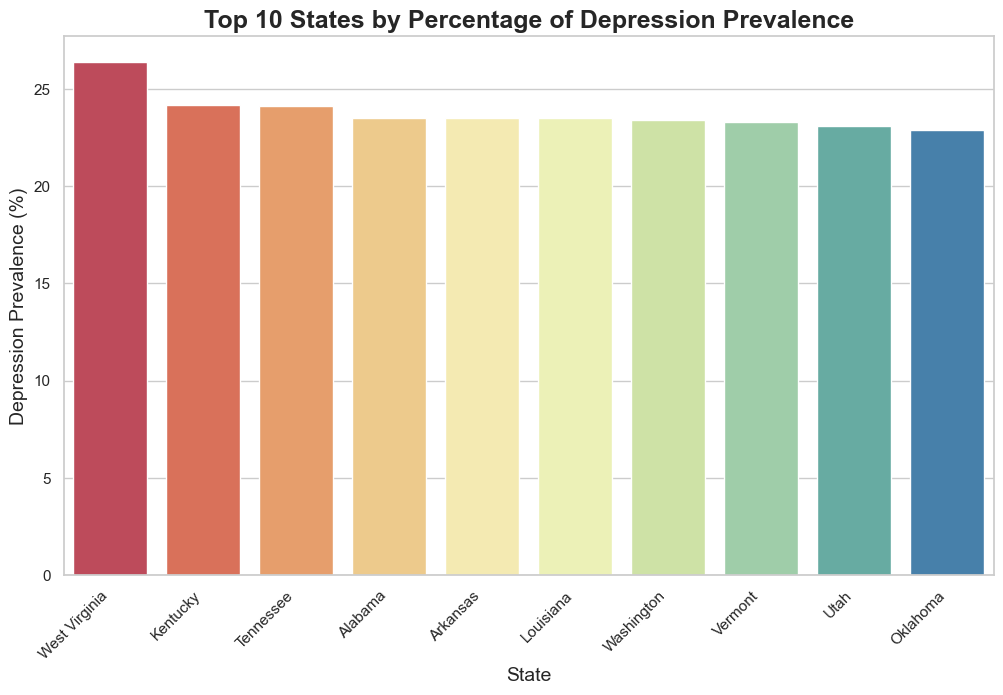

In [164]:
country_sorted = final_country_perc.sort_values(by='prevalence_percent', ascending=False)
data_chart = pd.DataFrame(country_sorted)
df_top_10 = data_chart.head(10)
#Setup Visualization Style ---
sns.set_theme(style="whitegrid")

#Create the Bar Chart using the Filtered Data ---
plt.figure(figsize=(12, 7))

# Plot only the df_top_10 DataFrame
bar_plot = sns.barplot(
    x='state',
    y='prevalence_percent',
    data=df_top_10, # <-- Using the filtered DataFrame
    palette='Spectral'
)

#Enhance the Plot ---
plt.title('Top 10 States by Percentage of Depression Prevalence', fontsize=18, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Depression Prevalence (%)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

In [165]:
## Merge the table of depression percent per year with the main df table 
df_depressed=pd.merge(df,final_country_perc,on="state")

In [166]:
df_depressed

,incident_id,incident_date,incident_time,updated_date,state,city_or_county,address,business_location_name,latitude,longitude,...,victims_killed,victims_injured,suspects_killed,suspects_injured,suspects_arrested,incident_characteristics,sources,date_fixed,year,prevalence_percent
0,809048,"April 1, 2017",NaN,1491348530,Florida,Tampa,219 S Howard Ave,Palace Lounge,27.9431,-82.4831,...,1,4,0,0,1,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""http://wfla.com/2017/04/01/tampa-police-inv...",2017-04-01,2017,14.7
1,809499,"April 1, 2017",5:25 AM,1680156402,Oklahoma,Oklahoma City,1212 N Woodward Ave,NaN,35.4810,-97.5754,...,2,3,0,0,1,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""http://www.news9.com/story/35055747/okc-pol...",2017-04-01,2017,22.9
2,809815,"April 1, 2017",NaN,1492995601,California,Pittsburg,100 block of Madoline Street,NaN,38.0053,-121.8950,...,0,5,0,0,1,"Shot - Wounded/Injured, Mass Shooting (4+ vict...",http://www.nbcbayarea.com/news/local/Shooting-...,2017-04-01,2017,14.1
3,1082835,"April 1, 2018",2:15 AM,1522693801,Michigan,Saginaw,600 block of Yale St,NaN,43.4192,-83.9819,...,0,5,0,0,0,"Shot - Wounded/Injured, Mass Shooting (4+ vict...",http://www.mlive.com/news/saginaw/index.ssf/20...,2018-04-01,2018,19.5
4,1083011,"April 1, 2018",NaN,1646889853,Alabama,Mobile,3556 Halls Mill Rd,Grand Hall,30.6387,-88.1228,...,1,4,0,0,3,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""http://www.al.com/news/mobile/index.ssf/201...",2018-04-01,2018,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463,2411007,"September 9, 2022",4:50 PM,1722738993,New York,Bronx,810 Astor Ave,Pelham Parkway Houses,40.8592,-73.8634,...,0,4,0,0,1,"Shot - Wounded/Injured, Mass Shooting (4+ vict...","c(""https://twitter.com/NYC_Alerts911/status/15...",2022-09-09,2022,16.8
5464,2411901,"September 9, 2022",11:50 PM,1689272621,Minnesota,Minneapolis,328 W Broadway Ave,4th Street Saloon,44.9994,-93.2848,...,1,3,0,0,0,"Shot - Wounded/Injured, Shot - Dead (murder, a...","c(""https://www.fox9.com/news/2-pregnant-women-...",2022-09-09,2022,19.8
5465,2410446,"September 9, 2022",9:00 AM,1715920831,Maryland,Elk Mills,47 Hebron Ct,NaN,39.6611,-75.8365,...,4,0,1,0,0,"Shot - Dead (murder, accidental, or suicide), ...","c(""https://www.cbsnews.com/baltimore/news/five...",2022-09-09,2022,15.7
5466,2703975,"September 9, 2023",11:30 PM,1694472936,South Carolina,Rock Hill,800 block of Brunswick Dr,NaN,34.8921,-81.0411,...,0,4,0,0,2,"Shot - Wounded/Injured, Mass Shooting (4+ vict...",https://www.heraldonline.com/news/local/crime/...,2023-09-09,2023,21.4


In [167]:
incident_count = df_depressed.groupby("state").agg({"incident_id":"count","prevalence_percent":"mean"})
incident_count

,incident_id,prevalence_percent
state,,
Alabama,145,23.5
Alaska,6,15.9
Arizona,61,17.4
Arkansas,62,23.5
California,471,14.1
Colorado,87,18.5
Connecticut,35,17.7
Delaware,21,15.6
District of Columbia,90,19.8


In [168]:
cor_check=incident_count.sort_values(by="incident_id", ascending=False)
cor_check

#Comparing the top 10 states with highest depression percentage $ top 10 states with highest gun incidents, 
#only Tennessee appears on both list, prompting a correlation relationship check.

,incident_id,prevalence_percent
state,,
Illinois,524,14.7
California,471,14.1
Texas,387,17.7
Florida,308,14.7
Pennsylvania,271,20.2
Louisiana,249,23.5
New York,231,16.8
Georgia,225,17.2
Ohio,219,22.0


In [169]:
corr_matrix = cor_check.corr()
print("\nFull Correlation Matrix:\n", corr_matrix.round(4))


Full Correlation Matrix:
                     incident_id  prevalence_percent
incident_id              1.0000             -0.2423
prevalence_percent      -0.2423              1.0000


In [170]:
## There is a -0.24 correlation coefficient.
## There is a weak negative correlation between the count of incidents and depression prevalence in percent
## This implies that the number of incidents increases as the depression prevalence in percentage reduces in for all states.